Use this as the source and basis for pulling this together quickly i.e. borrowed a load of the code:
    https://github.com/geektechdude/Python_UK_Flood_Alert/blob/master/geektechstuff_flood_alert_uk.py

Rainfall api reference from Environment agency:
    https://environment.data.gov.uk/flood-monitoring/doc/rainfall

In [89]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#long and latitude saved in custom file in this folder so need to import them
from settings import long, lat

In [14]:
def flood_user_input(latitude,longitude,distance):
    # checks flood details near by
    atlantis =""
    input_lat = str(latitude)
    input_long = str(longitude)
    distance = str(distance)
    flood_url = 'http://environment.data.gov.uk/flood-monitoring/id/floods'
    flood_parameters = '?lat='+input_lat+'&long='+input_long+'&dist='+distance
    flood_query = flood_url+flood_parameters
    get_data = requests.get(flood_query)
    get_data.raise_for_status()
    analysis = get_data.json()
    items = analysis["items"]
    river = items[0]["floodArea"]["riverOrSea"]
    severity = items[0]["severity"]
    # severity level 1 is severe, 2 is flood warning, 3 is flood alert and 4 is warning no longer in force
    s_level = items[0]["severityLevel"]
    message = items[0]["message"]
    time_severity_changed = items[0]["timeSeverityChanged"]
    if s_level >=3:
        severity=str(severity)
        s_level=str(s_level)
        message=str(message)
        time_severity_changed=str(time_severity_changed)
        atlantis = "\nWARNING \n \n"+river+"\n \n"+"Severity level is at "+s_level+"\n \n"+severity+"\n \n"+message+"\n \n"+"Last update: "+time_severity_changed+"\n"
    else:
        atlantis = "All OKAY"
    return(atlantis)

In [29]:
def stations_near_user_input(latitude,longitude,distance):
    #returns details of the water stations near by
    base_url = "http://environment.data.gov.uk/flood-monitoring/id/stations"
    input_lat = str(latitude)
    input_long = str(longitude)
    distance = str(distance)
    user_parameters = '?lat='+input_lat+'&long='+input_long+'&dist='+distance
    station_url = base_url+user_parameters
    get_data = requests.get(station_url)
    get_data.raise_for_status()
    analysis = get_data.json()
    items = analysis["items"]
    url_for_station = items[0]["@id"]
    RLOIid = items[0]["RLOIid"]
    date_opened = items[0]["dateOpened"]
    station_name = items[0]["label"]
    whats_measured = items[0]["measures"][0]["parameterName"]
    str_url_for_station = str(url_for_station)
    str_station_name = str(station_name)
    str_RLOIid = str(RLOIid)
    str_dateOpened = str(date_opened)
    str_whats_measured = str(whats_measured)
    output_msg = "\n Station Name: "+str_station_name+"\n Station URL: "+str_url_for_station+"\n Station RLOIid: "+str_RLOIid+"\n Date Station Opened: "+str_dateOpened+"\n Station Measures: "+str_whats_measured+"\n"
    return(output_msg)

In [35]:
#control parameters
# use https://www.pgc.umn.edu/apps/convert/ for coords converter
#tried 1 to search.. 1 picks up for flood user but not for stations. my local one appears on 2
dist = 2

In [23]:
flood_user_input(lat,long,dist)

'\nWARNING \n \nRiver East Glen, River West Glen, River Tham\n \nSeverity level is at 3\n \nFlood alert\n \nOvernight we have seen heavy rainfall in the East and West Glens area. This means that the glens are now rising, which has led to flooding of low lying land and roads close to the river from now onwards. We expect the river to remain high throughout today, Tuesday, 19th January. Our forecasts indicate that flooding to properties is not likely and therefore flood warnings are not expected to be issued. Please avoid using low lying footpaths near local watercourses and plan driving routes to avoid low lying roads near rivers, which may be flooded. We are constantly monitoring river levels, and have staff in the field checking for blockages and clearing weedscreens. This message will be updated on Wednesday, 20th January, or as the situation changes. \n \nLast update: 2021-01-19T09:06:00\n'

In [36]:
stations_near_user_input(lat,long,dist)

'\n Station Name: Shillingthorpe\n Station URL: http://environment.data.gov.uk/flood-monitoring/id/stations/E2304\n Station RLOIid: 6027\n Date Station Opened: 1978-01-01\n Station Measures: Water Level\n'

In [43]:
def readings_from_station_auto():
    # Gives station details, current reading and historic high / low readings from station
    # Replace XXXXXXX with the station @id (see url_for_station from stations_near_auto())
    station_url = "https://environment.data.gov.uk/flood-monitoring/id/stations/E2304.json"
    get_data = requests.get(station_url)
    get_data.raise_for_status()
    analysis = get_data.json()
    analysis = get_data.json()
    items = analysis["items"]
    url_for_station = items["@id"]
    str_url_for_station = str(url_for_station)
    RLOIid = items["RLOIid"]
    str_RLOIid = str(RLOIid)
    date_opened = items["dateOpened"]
    str_date_opened = str(date_opened)
    station_name = items["label"]
    str_station_name = str(station_name)
    # current measurements
    current_measurement_date_time = items["measures"]["latestReading"]["dateTime"]
    str_current_measurement_date_time = str(current_measurement_date_time)
    current_measurement_value = items["measures"]["latestReading"]["value"]
    str_current_measurement_value = str(current_measurement_value)
    # historic measurements
    max_high = items["stageScale"]["maxOnRecord"]["value"]
    str_max_high = str(max_high)
    max_high_date = items["stageScale"]["maxOnRecord"]["dateTime"]
    str_max_high_date = str(max_high_date)
    min_low = items["stageScale"]["minOnRecord"]["value"]
    str_min_low = str(min_low)
    min_low_date = items["stageScale"]["minOnRecord"]["dateTime"]
    str_min_low_date = str(min_low_date)

    output_msg = "\n Station Name: "+str_station_name+"\n RLOIid: "+str_RLOIid+"\n Date Opened: "+str_date_opened+"\n Current Measurement: "+str_current_measurement_value+"\n Measurement Taken at: "+str_current_measurement_date_time+"\n Historic Hight: "+str_max_high+"\n Max High Date: "+str_max_high_date+"\n Min Height: "+str_min_low+"\n Minimum Height Date: "+str_min_low_date+"\n"
    return(output_msg)

In [44]:
readings_from_station_auto()

'\n Station Name: Shillingthorpe\n RLOIid: 6027\n Date Opened: 1978-01-01\n Current Measurement: 1.05\n Measurement Taken at: 2021-01-19T17:15:00Z\n Historic Hight: 1.56\n Max High Date: 2013-01-27T21:45:00\n Min Height: 0.01\n Minimum Height Date: 2006-11-14T12:45:00\n'

In [150]:
#return historic readings
station_url = "https://environment.data.gov.uk/flood-monitoring/id/stations/E2304/readings?_sorted"+"&_limit=10000"
get_data = requests.get(station_url)
get_data.raise_for_status()
analysis = get_data.json()
items = analysis["items"]


In [151]:
data = []
for x in items:
    data.append(x)
df = pd.DataFrame(data)   
df.head()

,@id,dateTime,measure,value
0,http://environment.data.gov.uk/flood-monitoring/data/readings/E2304-level-stage-i-15_min-m/2021-01-19T20-00-00Z,2021-01-19T20:00:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/E2304-level-stage-i-15_min-m,1.175
1,http://environment.data.gov.uk/flood-monitoring/data/readings/E2304-level-stage-i-15_min-m/2021-01-19T19-45-00Z,2021-01-19T19:45:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/E2304-level-stage-i-15_min-m,1.166
2,http://environment.data.gov.uk/flood-monitoring/data/readings/E2304-level-stage-i-15_min-m/2021-01-19T19-30-00Z,2021-01-19T19:30:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/E2304-level-stage-i-15_min-m,1.166
3,http://environment.data.gov.uk/flood-monitoring/data/readings/E2304-level-stage-i-15_min-m/2021-01-19T19-15-00Z,2021-01-19T19:15:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/E2304-level-stage-i-15_min-m,1.157
4,http://environment.data.gov.uk/flood-monitoring/data/readings/E2304-level-stage-i-15_min-m/2021-01-19T19-00-00Z,2021-01-19T19:00:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/E2304-level-stage-i-15_min-m,1.156


In [152]:
pd.set_option('display.max_colwidth', -1)
df['measure']=df['measure'].str.rsplit('/', 1).str[1]
df['dt'] =  pd.to_datetime(df['dateTime'])
df= df.drop(['@id','dateTime'], axis=1)
df.head()

C:\Users\William Cook\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,measure,value,dt
0,E2304-level-stage-i-15_min-m,1.175,2021-01-19 20:00:00+00:00
1,E2304-level-stage-i-15_min-m,1.166,2021-01-19 19:45:00+00:00
2,E2304-level-stage-i-15_min-m,1.166,2021-01-19 19:30:00+00:00
3,E2304-level-stage-i-15_min-m,1.157,2021-01-19 19:15:00+00:00
4,E2304-level-stage-i-15_min-m,1.156,2021-01-19 19:00:00+00:00


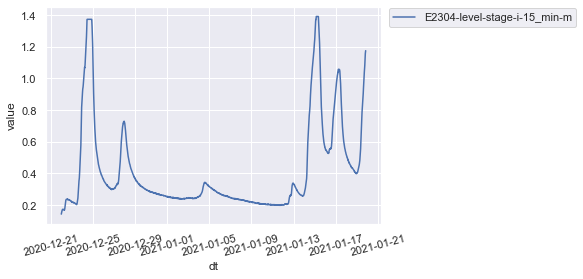

In [153]:
sns.lineplot(data=df,x='dt',y='value',hue='measure')
plt.xticks(rotation=15)
plt.legend(loc='center right',bbox_to_anchor=(1.6, 0.95), ncol=1)
plt.show()

In [142]:
#find rainfall only stations for the rainfall measure

def rainfall_near_user_input(latitude,longitude,distance):
    #returns details of the water stations near by
    base_url = "http://environment.data.gov.uk/flood-monitoring/id/stations"
    input_lat = str(latitude)
    input_long = str(longitude)
    distance = str(distance)
    user_parameters = '?parameter=rainfall'+'&lat='+input_lat+'&long='+input_long+'&dist='+distance
    station_url = base_url+user_parameters
    get_data = requests.get(station_url)
    get_data.raise_for_status()
    analysis = get_data.json()
    items1 = analysis["items"]
    url_for_station = items1[0]["@id"]
    return(url_for_station)

In [143]:
dist=10
rain_station = rainfall_near_user_input(lat,long,dist)
print(rain_station)

http://environment.data.gov.uk/flood-monitoring/id/stations/E7155


 "@id" : "http://environment.data.gov.uk/flood-monitoring/id/stations/E7155" ,
    "easting" : 506950 ,
    "gridReference" : "TF069064" ,
    "label" : "Rainfall station" ,
    "lat" : 52.645246 ,
    "long" : -0.420704 ,
    "measures" : [ { 
      "@id" : "http://environment.data.gov.uk/flood-monitoring/id/measures/E7155-rainfall-tipping_bucket_raingauge-t-15_min-mm" ,
      "parameter" : "rainfall" ,
      "parameterName" : "Rainfall" ,
      "period" : 900 ,
      "qualifier" : "Tipping Bucket Raingauge" ,
      "unitName" : "mm"
    }
     ] ,
    "northing" : 306450 ,
    "notation" : "E7155" ,
    "stationReference" : "E7155"

In [148]:
#return historic readings
#10000 is max limit allowed. 500 is default
rain_station_url = rain_station +"/readings?_sorted"+"&since=2016-01-01T00:00:00Z"+"&_limit=10000"
get_data_rain = requests.get(rain_station_url)
get_data_rain.raise_for_status()
analysis_rain = get_data_rain.json()
items_rain = analysis_rain["items"]
rain_data = []
for x in items_rain:
    rain_data.append(x)
rain_df = pd.DataFrame(rain_data)
rain_df['measure']=rain_df['measure'].str.rsplit('/', 1).str[1]
rain_df['dt'] =  pd.to_datetime(rain_df['dateTime'])
rain_df= rain_df.drop(['@id','dateTime'], axis=1)
rain_df.head()

,measure,value,dt
0,E7155-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0,2021-01-19 19:15:00+00:00
1,E7155-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0,2021-01-19 19:00:00+00:00
2,E7155-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0,2021-01-19 18:45:00+00:00
3,E7155-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0,2021-01-19 18:30:00+00:00
4,E7155-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0,2021-01-19 18:15:00+00:00


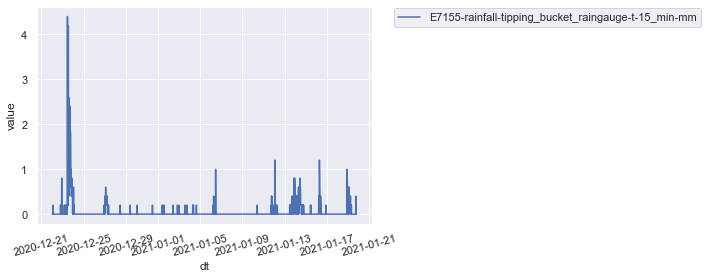

In [149]:
sns.lineplot(data=rain_df,x='dt',y='value',hue='measure')
plt.xticks(rotation=15)
plt.legend(loc='center right',bbox_to_anchor=(2, 0.95), ncol=1)
plt.show()